In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install torch 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Generiranje kugli 


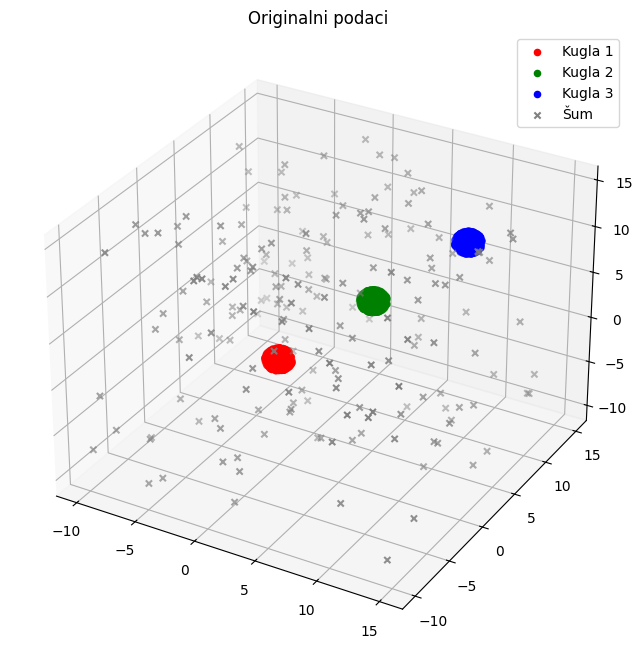

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def generate_spheres(n):
    phi = np.random.uniform(0, 2 * np.pi, n)  # Azimutalni kutovi
    theta = np.random.uniform(0, np.pi, n)    # Polarni kutovi
    x = np.sin(theta) * np.cos(phi)           
    y = np.sin(theta) * np.sin(phi)           
    z = np.cos(theta)                         
    return np.vstack((x, y, z)).T             # Vraća n x 3 matricu

def add_noise(data, noise_points):
    noise = np.random.uniform(-10, 15, (noise_points, data.shape[1]))
    return np.vstack((data, noise))
#Permutacija koordinata
def permute_coordinates(data):
    permuted_data = np.copy(data)
    np.random.shuffle(permuted_data.T)  
    return permuted_data

n = 300
K1 = generate_spheres(n)
K2 = generate_spheres(n) + 5
K3 = generate_spheres(n) + 10

# Dodavanje šuma u obliku 200 slučajnih točkica
data = np.vstack((K1, K2, K3))
data_with_noise = add_noise(data, 200) 

# Dodavanje dodatnih koordinata 
noise = np.random.uniform(0, 1, (data_with_noise.shape[0], 7))
data_noisy = np.hstack((data_with_noise, noise))

#Permutacija koordinata
data_permuted = permute_coordinates(data_noisy)

# Vizualizacija originalnih podataka
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111, projection='3d')

# Prikaz svake kugle u različitoj boji
ax1.scatter(K1[:, 0], K1[:, 1], K1[:, 2], color='red', marker='o', label='Kugla 1')
ax1.scatter(K2[:, 0], K2[:, 1], K2[:, 2], color='green', marker='o', label='Kugla 2')
ax1.scatter(K3[:, 0], K3[:, 1], K3[:, 2], color='blue', marker='o', label='Kugla 3')
ax1.scatter(data_with_noise[n*3:, 0], data_with_noise[n*3:, 1], data_with_noise[n*3:, 2], color='gray', marker='x', label='Šum')

# Postavke grafike
ax1.set_title('Originalni podaci')
ax1.legend()

plt.show()

PCA 


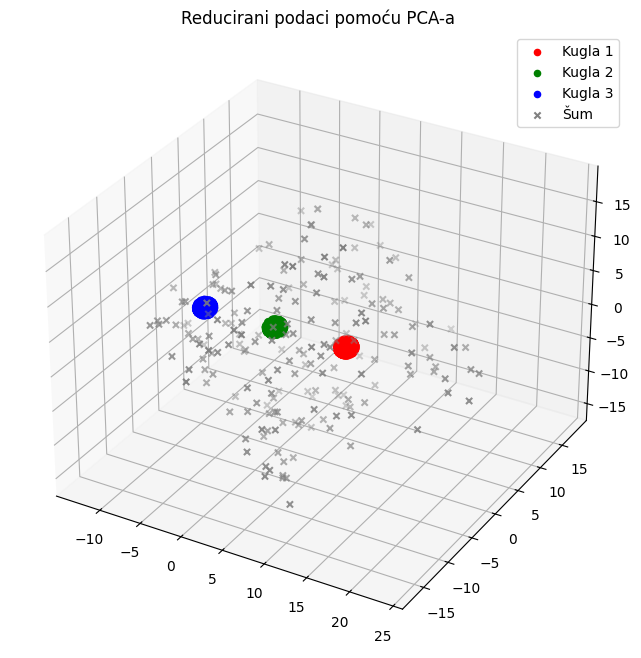

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_permuted)  

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

total_points = data_pca.shape[0]
n_kugli = n * 3

ax.scatter(data_pca[:n, 0], data_pca[:n, 1], data_pca[:n, 2], color='red', marker='o', label='Kugla 1')
ax.scatter(data_pca[n:2*n, 0], data_pca[n:2*n, 1], data_pca[n:2*n, 2], color='green', marker='o', label='Kugla 2')
ax.scatter(data_pca[2*n:n_kugli, 0], data_pca[2*n:n_kugli, 1], data_pca[2*n:n_kugli, 2], color='blue', marker='o', label='Kugla 3')
ax.scatter(data_pca[n_kugli:, 0], data_pca[n_kugli:, 1], data_pca[n_kugli:, 2], color='gray', marker='x', label='Šum')

ax.legend()
ax.set_title('Reducirani podaci pomoću PCA-a')

plt.show()


SVD

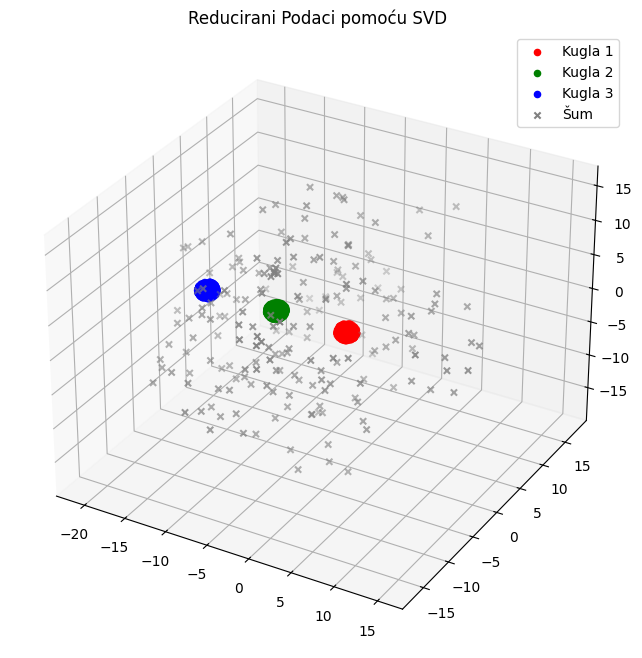

In [8]:
import numpy as np
import matplotlib.pyplot as plt

U, S, VT = np.linalg.svd(data_permuted) 
data_svd = U[:, :3] @ np.diag(S[:3])  

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

total_points = data_svd.shape[0]
n_kugli = n * 3

ax.scatter(data_svd[:n, 0], data_svd[:n, 1], data_svd[:n, 2], color='red', marker='o', label='Kugla 1')
ax.scatter(data_svd[n:2*n, 0], data_svd[n:2*n, 1], data_svd[n:2*n, 2], color='green', marker='o', label='Kugla 2')
ax.scatter(data_svd[2*n:n_kugli, 0], data_svd[2*n:n_kugli, 1], data_svd[2*n:n_kugli, 2], color='blue', marker='o', label='Kugla 3')
ax.scatter(data_svd[n_kugli:, 0], data_svd[n_kugli:, 1], data_svd[n_kugli:, 2], color='gray', marker='x', label='Šum')


ax.legend()
ax.set_title('Reducirani Podaci pomoću SVD-a')

plt.show()


Epoch [500/3000], Loss: 0.0678
Epoch [1000/3000], Loss: 0.0417
Epoch [1500/3000], Loss: 0.0481
Epoch [2000/3000], Loss: 0.0145
Epoch [2500/3000], Loss: 0.0301
Epoch [3000/3000], Loss: 0.0360


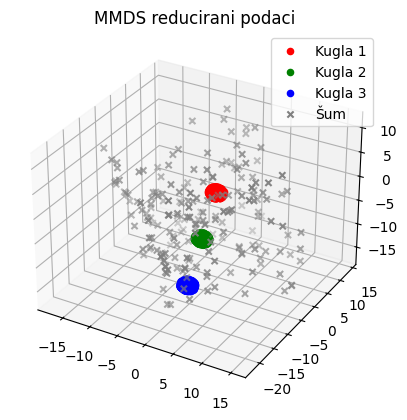

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class MDSNet(tf.keras.Model):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(MDSNet, self).__init__()
        self.hidden_layers = []
        
        for hidden_dim in hidden_dims:
            self.hidden_layers.append(
                tf.keras.layers.Dense(hidden_dim, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(1e-5))
            )
            self.hidden_layers.append(tf.keras.layers.Dropout(0.2))
        
        self.output_layer = tf.keras.layers.Dense(output_dim, activation=None)
    
    def call(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        
        return self.output_layer(x)


def pairwise_distances(x):
    dot_product = tf.matmul(x, tf.transpose(x))
    square_norm = tf.linalg.diag_part(dot_product)
    distances = tf.expand_dims(square_norm, 0) - 2.0 * dot_product + tf.expand_dims(square_norm, 1)
    distances = tf.sqrt(tf.maximum(distances, 1e-9)) 
    return distances


input_dim = data_noisy.shape[1]
hidden_dims = [128, 64, 32]  
output_dim = 3


model_mmds = MDSNet(input_dim, hidden_dims, output_dim)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

@tf.function
def train_step(batch_data):
    with tf.GradientTape() as tape:
        output = model_mmds(batch_data)
        distance_orig = pairwise_distances(batch_data)
        distance_proj = pairwise_distances(output)
        loss = tf.reduce_mean(tf.square(distance_proj - distance_orig))
    gradients = tape.gradient(loss, model_mmds.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model_mmds.trainable_variables))
    return loss


labels = np.concatenate([
    np.zeros(300),  
    np.ones(300),   
    np.full(300, 2) 
])


additional_labels = np.full(200, -1)  
labels = np.concatenate([labels, additional_labels])


epochs = 3000
batch_size = 32
losses = []

data_noisy_tensor = tf.convert_to_tensor(data_noisy, dtype=tf.float32)

for epoch in range(epochs):
    permutation = np.random.permutation(data_noisy.shape[0])
    for i in range(0, data_noisy.shape[0], batch_size):
        indices = permutation[i:i+batch_size]
        batch_data = tf.gather(data_noisy_tensor, indices)
        loss = train_step(batch_data)
    losses.append(loss.numpy())
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss:.4f}')

output_data = model_mmds(data_noisy_tensor).numpy()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(output_data[labels == 0, 0], output_data[labels == 0, 1], output_data[labels == 0, 2], color='red', label='Kugla 1')
ax.scatter(output_data[labels == 1, 0], output_data[labels == 1, 1], output_data[labels == 1, 2], color='green', label='Kugla 2')
ax.scatter(output_data[labels == 2, 0], output_data[labels == 2, 1], output_data[labels == 2, 2], color='blue', label='Kugla 3')
if np.any(labels == -1):
    ax.scatter(output_data[labels == -1, 0], output_data[labels == -1, 1], output_data[labels == -1, 2], color='grey', marker='x', label='Šum')



ax.set_title('MMDS reducirani podaci')
ax.legend()
plt.show()